# Meta-Data - Study II
## Imports

In [3]:
# Load Dependencies
import seaborn as sns
import Study_Uniform.paths as Study_uniform_paths
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Load Data
study_uniform_GL = pd.read_pickle(Study_uniform_paths.processed_dir + Study_uniform_paths.post_exclusion_data_pickle_filename) # Study II: Post-exclusion group-level data

## Demographics

   sona subject_gender
0    81         Female
1    32           Male


D:\Users\selte\anaconda3\envs\Scale_Studies\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


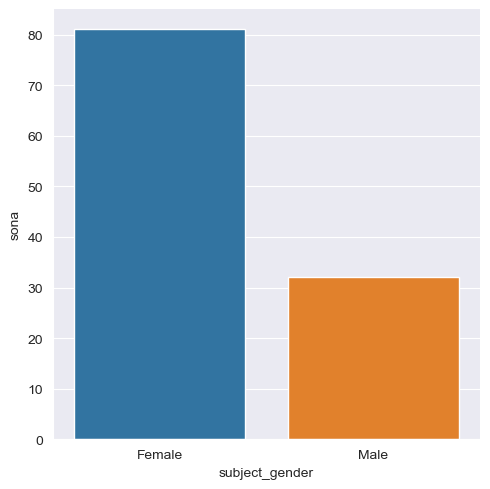

In [5]:
temp = study_uniform_GL



# Only keep the most recent 'subject'
temp = temp.drop_duplicates(subset=['subject'], keep='last')
temp = temp.drop_duplicates(subset=['sona'], keep='last')

# group total subjects by length
temp = temp.groupby(['subject_gender']).count().reset_index()
# plot
sns.catplot(y="sona", x="subject_gender", kind="bar", data=temp)

# Print number of subjects
print(temp[['sona','subject_gender']])

Average age and range of ages for each melody length:
  index  subject_age
0  mean    19.723214
1   min    18.000000
2   max    24.000000


D:\Users\selte\anaconda3\envs\Scale_Studies\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


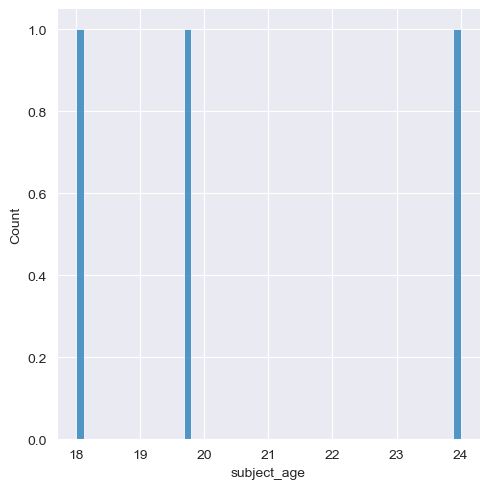

In [6]:
temp = study_uniform_GL
# Only keep the most recent 'subject'
temp = temp.drop_duplicates(subset=['subject'], keep='last')
temp = temp.drop_duplicates(subset=['sona'], keep='last')

# Only keep ages under 120
temp = temp[temp['subject_age'] < 120]

# Get average age and range of ages for each melody length
temp = temp.agg({'subject_age': ['mean', 'min', 'max']}).reset_index()

# Plot the age distribution
sns.displot(data=temp, x="subject_age", bins=50)


print("Average age and range of ages for each melody length:")
print(temp)



## Plots
### Number of subjects per set

D:\Users\selte\anaconda3\envs\Scale_Studies\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


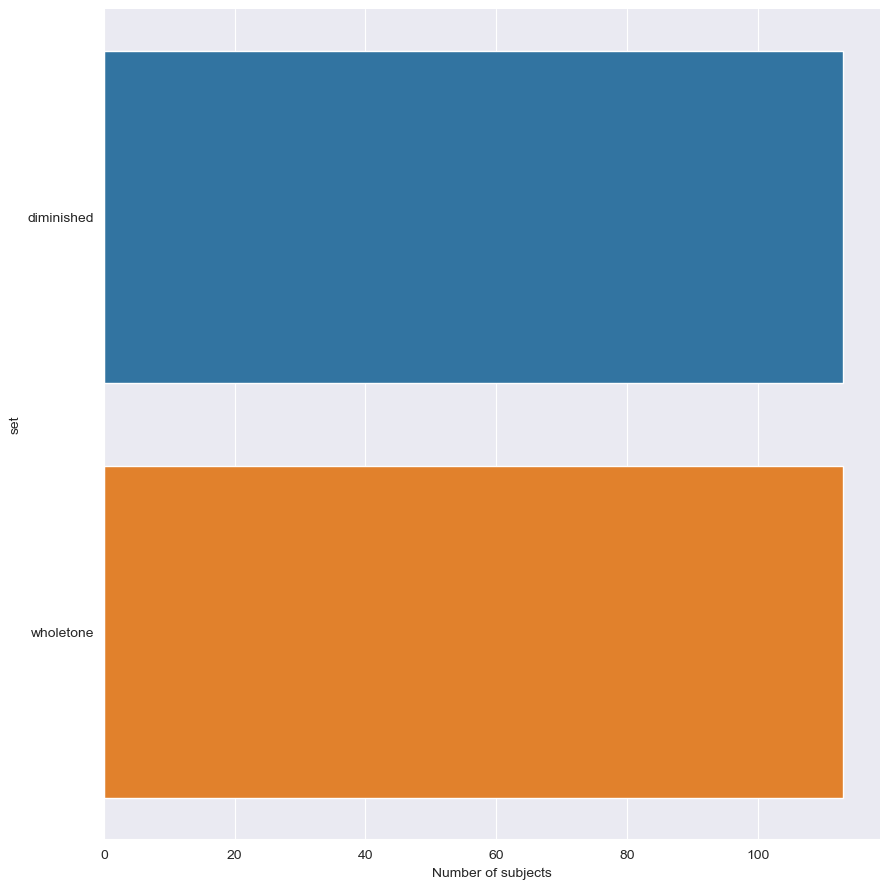

In [7]:
temp = study_uniform_GL.groupby('set').count().reset_index()
temp = temp.rename(columns={'subject':'Number of subjects'})
plot_order = temp.sort_values(by=["Number of subjects"], ascending=False)['set'].values
sns.catplot(y="set", x="Number of subjects", kind="bar", data=temp, order=plot_order, height=9)
plt.savefig(Study_uniform_paths.plots_dir + "subjects_per_set.svg")

### Avg. number of trials per set

In [8]:
temp = study_uniform_GL.groupby('set').mean().reset_index()
temp = temp.rename(columns={'# trials':'Avg. number of trials per subject'})
plot_order = temp.sort_values(by=["Avg. number of trials per subject"], ascending=False)['set']
sns.catplot(y="set", x="Avg. number of trials per subject", kind="bar", data=temp, order=plot_order, height=9)
plt.savefig(Study_uniform_paths.plots_dir + "mean_trials_per_set.svg")

TypeError: Could not convert ATON0006ATON0007ATON0008ATON0012ATON0015ATON0016ATON0017ATON0018ATON0019ATON0020ATON0021ATON0022ATON0024ATON0026ATON0029ATON0030ATON0035ATON0041ATON0042ATON0045ATON0047ATON0048ATON0049ATON0050ATON0069ATON0071ATON0072ATON0074ATON0075ATON0077ATON0078ATON0080ATON0083ATON0084ATON0085ATON0088ATON0089ATON0091ATON0094ATON0096ATON0097ATON0098ATON0099ATON0100ATON0101ATON0104ATON0108ATON0110ATON0115ATON0121ATON0123ATON0125ATON0128ATON0129ATON0131ATON0132ATON0134ATON0136ATON0138ATON0140ATON0143ATON0144ATON0147ATON0150ATONB0002ATONB0003ATONB0004ATONB0006ATONB0007ATONB0009ATONB0010ATONB0011ATONB0015ATONB0016ATONB0017ATONB0018ATONB0020ATONB0022ATONB0023ATONB0027ATONB0028ATONB0035ATONB0036ATONB0037ATONB0039ATONB0041ATONB0042ATONB0048ATONB0054ATONB0055ATONB0065ATONB0068ATONB0071ATONB0074ATONB0075ATONB0076ATONB0077ATONB0078ATONB0079ATONB0082ATONB0085ATONB0087ATONB0088ATONB0093ATONB0102ATONB0103ATONB0106ATONB0109ATONB0112ATONB0114ATONB0118ATONB0119ATONB0120 to numeric

### Avg. number of trials per subject - When ignoring neither presses

In [7]:
temp = study_uniform_GL.groupby('set').mean().reset_index()
temp = temp.rename(columns={'# no_neither_trials':'Avg. number of trials per subject (ignoring neithers)'})
plot_order = temp.sort_values(by=["Avg. number of trials per subject (ignoring neithers)"], ascending=False)['set'].values
sns.catplot(y="set", x="Avg. number of trials per subject (ignoring neithers)", kind="bar", data=temp, order=plot_order, height=9)
plt.savefig(Study_uniform_paths.plots_dir + "mean_trials_per_subject.svg")

TypeError: Could not convert ATONB0004ATONB0007ATONB0009ATONB0010ATONB0011ATONB0015ATONB0016ATONB0017ATONB0018ATONB0020ATONB0022ATONB0023ATONB0028ATONB0035ATONB0036ATONB0037ATONB0039ATONB0041ATONB0042ATONB0048ATONB0054ATONB0055ATONB0065ATONB0068 to numeric

### Distribution of button presses
1st - left button
neither - middle button
2nd - right button

D:\Users\selte\anaconda3\envs\Scale_Studies\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


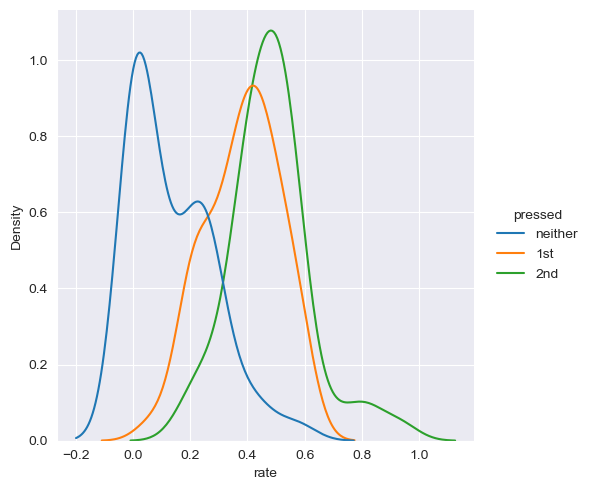

In [7]:
# Study II: Distribution of button presses
temp = study_uniform_GL[['subject', 'rate pressed neither (task)','rate pressed 1st (task)','rate pressed 2nd (task)']]
temp = temp.rename(columns={'rate pressed neither (task)':'neither','rate pressed 1st (task)':'1st','rate pressed 2nd (task)':'2nd'})
temp = temp.groupby('subject').mean().stack().reset_index()
temp = temp.rename(columns={'level_1':'pressed',0:'rate'})
sns.displot(data=temp, x="rate", hue="pressed",kind='kde')
plt.savefig(Study_uniform_paths.plots_dir + "dist_of_buttons.svg")

### Distribution of amount of "neither" presses across the task

D:\Users\selte\anaconda3\envs\Scale_Studies\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


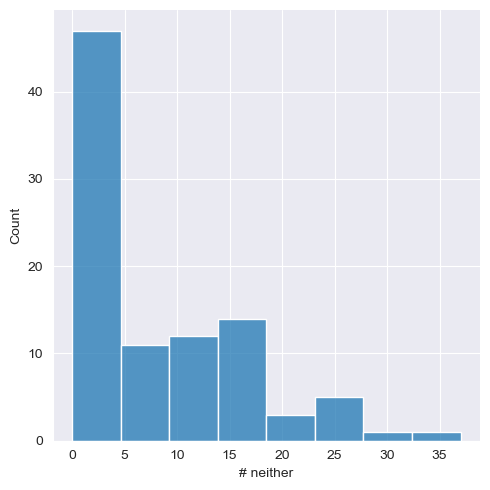

In [8]:
# Study II: Distribution of amount of neithers across the task
sns.displot(data=study_uniform_GL, x="# neither")
plt.savefig(Study_uniform_paths.plots_dir + "dist_of_neithers.svg")

### Number of subjects by musical experience


In [9]:
temp = study_uniform_GL.groupby('sona').first().reset_index()


no_training = temp[temp['How many years of formal musical training do you have?'] == "0"].shape[0]

lots_of_training = temp[temp['How many years of formal musical training do you have?'].isin(["6-8", "9+"])].shape[0]

only_latest_subject = study_uniform_GL.drop_duplicates(subset=['subject'], keep='last')

task_counts = only_latest_subject.groupby(['sona']).count().reset_index()
took_3_times = task_counts[task_counts['index'] == 3].shape[0]
took_2_times = task_counts[task_counts['index'] == 2].shape[0]
took_1_time = task_counts[task_counts['index'] == 1].shape[0]


print(f"{no_training} subjects self-reported having no formal music training at all, and {lots_of_training} self-reported having more than 5 years of formal musical training. {took_3_times} subjects took the task 3 times, {took_2_times} subjects took the task 2 times, and the remaining took it once. The online experiment was self-paced and was designed to last approximately one hour")


12 subjects self-reported having no formal music training at all, and 8 self-reported having more than 5 years of formal musical training. 0 subjects took the task 3 times, 0 subjects took the task 2 times, and the remaining took it once. The online experiment was self-paced and was designed to last approximately one hour
